## Go Pokemon! What does the data talk about?

Student: Chia Lin Chiu #47717533 , Arham Newaz #

Professor: Peifan Wu

Econ323-002


### Introduction of the data

Like many people’s childhoods, we were crazy players of Pokémon game. However, we don't know whether the meaning behind the dataset is different from our previous perceptions of playing. First of all, there are complete dataset of the seven generations of pokemon on kaggle(Resource: https://www.kaggle.com/rounakbanik/pokemon). Dataset Pokemon.csv that we applied can be found on this website. There are 801 columns for each Pokemon, and each one is ranged from the against, abilities to speed, blood value, attack power...etc. 





### Outline 

- ##### Understanding nature of the dataset 
- ##### Trends by each generation 
- ##### Correlation 
- ##### Model comparison 
- ##### Final goal:

In [39]:
# import statement
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import math
import scipy.stats as sc
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
Pokemon = pd.read_csv("./pokemon.csv") 
# This csv file is origin dataset from Kaggle.

Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])

### Section 1: What are the Pokemon stat differences/ trends from each generation? 

-   Hypothesis floated in our mind: We think there is a stat inflation by each newer generation, which means the newer pokemon genertaion is better than the old pokemon generation 

    Lets see what is going on ...

In [3]:
# first, using generation column to set the DataFrame index.
# Because our purpose is to compare the different generations.

Pokemon_generation = Pokemon.set_index(["generation"])
Pokemon_generation
generation=pd.DataFrame(Pokemon_generation[Pokemon_generation.columns[33:39]])
generation


,sp_attack,sp_defense,speed,type1,type2,weight_kg
generation,,,,,,
1,65,65,45,grass,poison,6.9
1,80,80,60,grass,poison,13.0
1,122,120,80,grass,poison,100.0
1,60,50,65,fire,NaN,8.5
1,80,65,80,fire,NaN,19.0
...,...,...,...,...,...,...
7,107,101,61,steel,flying,999.9
7,59,31,109,grass,steel,0.1
7,97,53,43,dark,dragon,888.0


<AxesSubplot:xlabel='generation'>

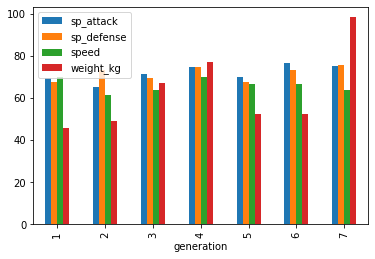

In [4]:
p1=generation.groupby(pd.Grouper(level="generation")).mean()
p1.plot.bar()

<AxesSubplot:xlabel='generation', ylabel='count'>

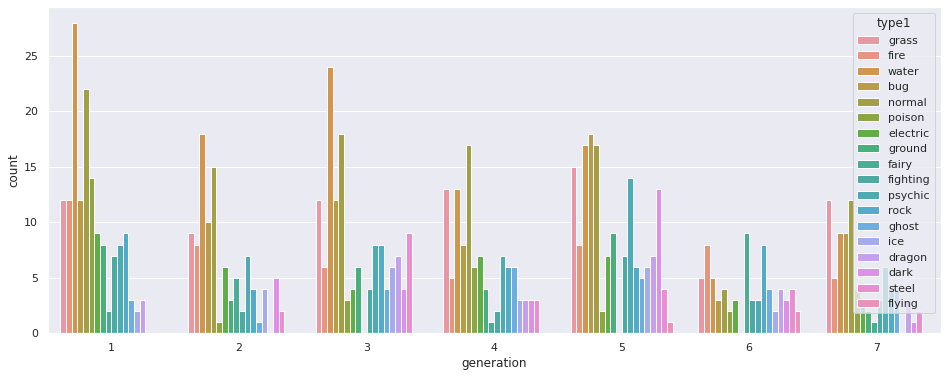

In [5]:
sns.set(font_scale=1)
plt.figure(figsize=(16,6))
sns.countplot(x="generation",hue="type1", data=Pokemon)

In [8]:
# type count
type_gen=generation.groupby("generation")["type1","type2"].count()
type_gen

/tmp/ipykernel_182/1804468249.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_gen=generation.groupby("generation")["type1","type2"].count()


,type1,type2
generation,,
1,151,81
2,100,49
3,135,66
4,107,54
5,156,75
6,72,41
7,80,51


Text(0.5, 1.0, 'type count')

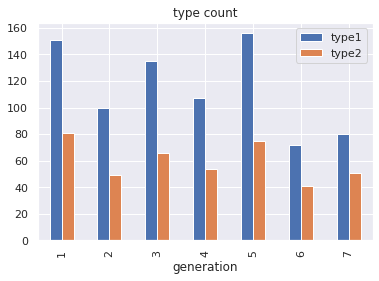

In [109]:
type_gen.plot.bar(subplots=False)
plt.title("type count")

Text(0.5, 1.0, 'box-and-whisker plot')

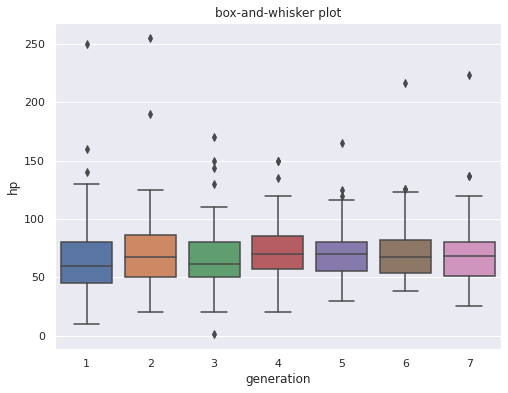

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="hp", data=Pokemon)
plt.title('box-and-whisker plot')

<AxesSubplot:xlabel='generation', ylabel='speed'>

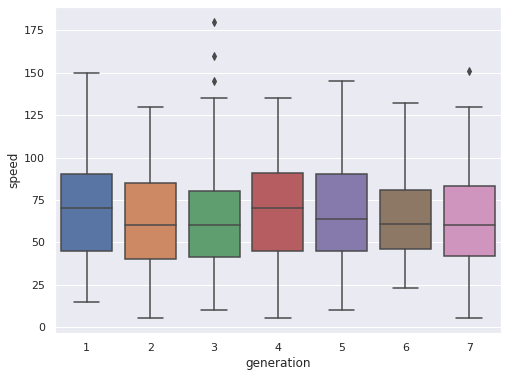

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="speed", data=Pokemon)

In [30]:
gen1 = Pokemon[Pokemon['generation'] == 1]
gen2 = Pokemon[Pokemon['generation'] == 2]
gen3 = Pokemon[Pokemon['generation'] == 3]
gen4 = Pokemon[Pokemon['generation'] == 4]
gen5 = Pokemon[Pokemon['generation'] == 5]
gen6 = Pokemon[Pokemon['generation'] == 6]
gen7 = Pokemon[Pokemon['generation'] == 7]

Correlation 

In [33]:

print('Correlation between hp and speed in generation 1 =',gen1['hp'].corr(gen1['speed']))
print('Correlation between hp and speed in generation 2 =',gen2['hp'].corr(gen2['speed']))
print('Correlation between hp and speed in generation 3 =',gen3['hp'].corr(gen3['speed']))
print('Correlation between hp and speed in generation 4 =',gen4['hp'].corr(gen4['speed']))
print('Correlation between hp and speed in generation 5 =',gen5['hp'].corr(gen5['speed']))
print('Correlation between hp and speed in generation 6 =',gen6['hp'].corr(gen6['speed']))
print('Correlation between hp and speed in generation 7 =',gen7['hp'].corr(gen7['speed']))



Correlation between hp and speed in generation 1 = -0.02315482771461441
Correlation between hp and speed in generation 2 = 0.15490296843431908
Correlation between hp and speed in generation 3 = 0.25394253674073497
Correlation between hp and speed in generation 4 = 0.2239174624871413
Correlation between hp and speed in generation 5 = 0.22416564097386785
Correlation between hp and speed in generation 6 = 0.29043893041413577
Correlation between hp and speed in generation 7 = 0.1494638897212455


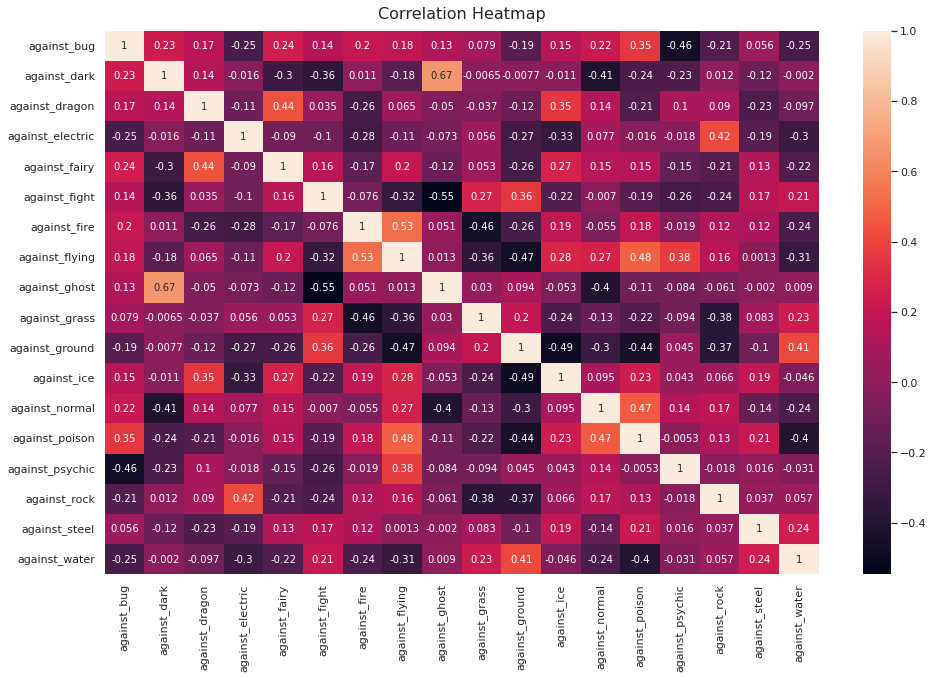

In [50]:
plt.figure(figsize=(16, 10))
against=Pokemon.iloc[:,1:19]
sns.heatmap(against.corr(),annot=True)

plt.title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

### Section 2: What are the key differences between pokemon types and stats? 

   We assumed that Pokemon which has more than one type(own two types) has higher total stats(hp, speed, attack..etc)
   We will attempt to establish a theme of pokemon type and their distribution of stats.
   

In [85]:
ok=Pokemon.fillna(0)
gen1 = ok[ok['generation'] == 1]
#data = gen1.set_index(["type1"])
#Pokemon_type1=pd.DataFrame(data)


onlytype1=gen1[gen1['type2'] == 0]

onlytype2=gen1[gen1['type2'] != 0]

print(onlytype1.total.describe())
print(onlytype2.total.describe())
#------- Gen 2 

gen2 = ok[ok['generation'] == 2]
data = gen2.set_index(["type1"])
Pokemon_type1=pd.DataFrame(data)


onlytype1for2=gen2[gen2['type2'] == 0]

onlytype2for2=gen2[gen2['type2'] != 0]

print(onlytype1for2.total.describe())
print(onlytype2for2.total.describe())

count     70.000000
mean     407.600000
std      113.019865
min      195.000000
25%      320.000000
50%      402.500000
75%      490.000000
max      780.000000
Name: total, dtype: float64
count     81.000000
mean     423.728395
std      111.784280
min      195.000000
25%      325.000000
50%      435.000000
75%      500.000000
max      640.000000
Name: total, dtype: float64
count     51.000000
mean     400.470588
std      115.588988
min      180.000000
25%      311.500000
50%      405.000000
75%      500.000000
max      610.000000
Name: total, dtype: float64
count     49.000000
mean     426.408163
std      125.741620
min      210.000000
25%      330.000000
50%      430.000000
75%      485.000000
max      700.000000
Name: total, dtype: float64


In [86]:
edata=Pokemon.fillna(0)
allgentype1=edata[edata['type2'] == 0]
allgentype2= edata[edata['type2'] != 0]



print(allgentype2.base_total.describe())
print(allgentype1.base_total.describe())
print(edata.base_total.describe())

count    417.000000
mean     445.894484
std      119.354125
min      190.000000
25%      340.000000
50%      464.000000
75%      520.000000
max      780.000000
Name: base_total, dtype: float64
count    384.000000
mean     409.354167
std      116.235399
min      180.000000
25%      310.000000
50%      405.000000
75%      495.000000
max      780.000000
Name: base_total, dtype: float64
count    801.000000
mean     428.377029
std      119.203577
min      180.000000
25%      320.000000
50%      435.000000
75%      505.000000
max      780.000000
Name: base_total, dtype: float64


Text(0, 0.5, 'total values')

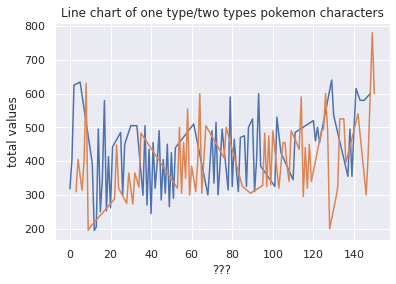

In [87]:
onlytype2.base_total.plot()
onlytype1.base_total.plot()

plt.title('Line chart of one type/two types pokemon characters')
plt.xlabel('???')
plt.ylabel('total values')
 

In [88]:
print(sc.stats.ttest_ind(onlytype1.total,onlytype2.total))
sc.stats.ttest_ind(allgentype1.total,allgentype2.total)

Ttest_indResult(statistic=-0.8796089051707912, pvalue=0.38048763695778676)


Ttest_indResult(statistic=-4.383170789740527, pvalue=1.3258212170067869e-05)

- Radar Chart

In [81]:
pip install soccerplots

Note: you may need to restart the kernel to use updated packages.


In [82]:
from soccerplots.radar_chart import Radar

temp=['name','sp_attack','sp_defense','attack','defense','hp','speed',]

for i in range(len(temp)):
    df=Pokemon[temp]

df=df[(df['name']=='Pikachu')|(df['name']=='Hypno')].reset_index()
df=df.drop(['index'],axis=1)
params=list(df.columns)
params=params[1:]
ranges=[]
a_value=[]
b_value=[] #create an empty list

for x in params:
    a=min(df[params][x])
    a=a-(a*0.25)
    
    b=max(df[params][x])
    b=b+(b*0.25)
    
    ranges.append((a,b))
    
for x in range(len(df['name'])):
    if df['name'][x]=='Pikachu':        
        a_values=df.iloc[x].values.tolist()
    if df['name'][x]=='Hypno':      
        b_values=df.iloc[x].values.tolist()
        
a_values=a_values[1:]
b_values=b_values[1:]

values=[a_values,b_values]

In [83]:
title=dict(
    title_name='Pikachu',
    title_color='gold',
    subtitle_name='Type: Electric',
    subtitle_clor='red',
    title_name_2='Hypno',
    title_color_2='teal',
    subtitle_name_2='Type: Psychic',
    subtitle_clor_2='blue',
    title_fontsize=18,
    subtitle_fontsize=15   
)
endnote='endnote'

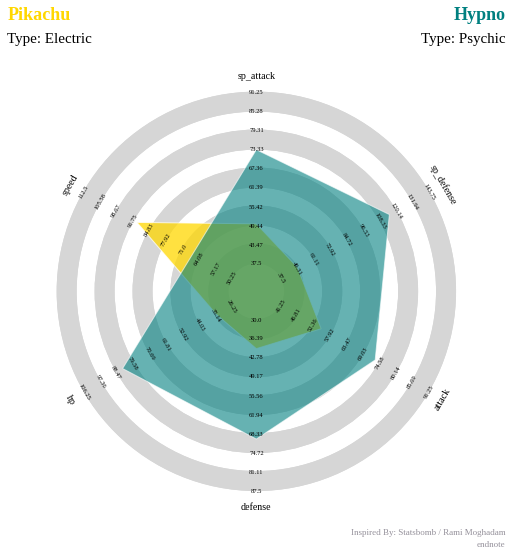

In [84]:
radar=Radar()
fig, ax=radar.plot_radar(ranges=ranges, params=params,values=values, 
                        radar_color=['gold','teal'],
                         alphas=[0.75,0.6], title=title, endnote=endnote,
                         compare=True)

### Section 3: Regression models with different stats to do projection of some functions.

Now we already figured out how the types affect Pokemon performance in each generation. We try to predict the eighth generation (already exist tho) whether their percentage of some performances increase. In this part we attempt to create some machine learning models that will guess if given purely just the stats of any pokemon, it will determine if it is truly Legendary. Here are five objectives:

-  1. Simple Linear model regression (eg. we choose special attack / special defense) 
-  2. Multiple linear regression (eg. we choose )
-  3. Lasso Regression
-  4. Random Forest Regression  
-  5. Machine Learning 



Then... start
- 1) Simple Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = Pokemon.iloc[:, 33].values.reshape(-1,1) # we choose 'sp_attack'for our x
y = Pokemon.iloc[:,34].values # we chosse 'sp_defense' for our y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

w_0 = regressor.intercept_
w_1 = regressor.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)

# result sp_defense = 0.45* sp_attack + 38.65 

Interception :  38.65466117361639
Coeficient :  [0.45199567]


In [33]:
#the accuracy
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.24156740355004558
Accuracy: 24.15674035500456%


In [34]:
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [ 99.67407602 104.19403268  58.99446612  95.15411937  45.43459616
  45.43459616  74.81431442  79.33427107 110.97396766  74.81431442
  97.4140977   56.7344878   56.7344878   68.03437943  74.81431442
  49.95455281  66.22639677  83.85422773  71.19834909  77.97828408
  83.85422773  65.77440111  73.91032309  72.55433609  99.67407602
  65.77440111  72.55433609  74.81431442  63.51442278  86.11420606
  61.25444445  54.47450947  92.89414104  70.29435776  49.95455281
  54.92650513  56.7344878   81.5942494   83.85422773  89.27817572
  65.32240544  88.37418438  77.97828408  52.21453114  74.81431442
  90.63416271  68.03437943  56.7344878   65.77440111  80.2382624
  86.11420606  81.5942494   77.07429275  63.51442278  54.47450947
  56.7344878   83.85422773  79.33427107  63.06242711  68.03437943
  95.15411937  65.77440111  92.89414104  56.7344878   79.33427107
  49.95455281  61.25444445  77.07429275  63.51442278  54.47450947
  63.51442278  63.96641844  81.5942494   58.99446612  74.81431442


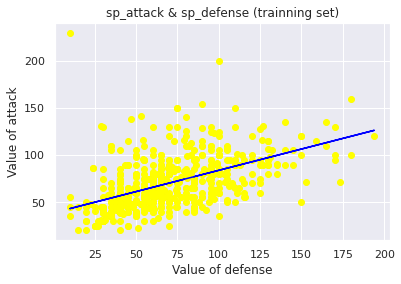

In [27]:
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sp_attack & sp_defense (trainning set)')
plt.xlabel("Value of defense") 
plt.ylabel("Value of attack")
plt.show()

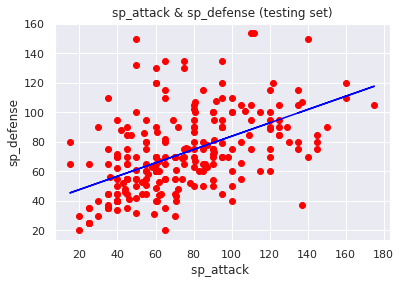

In [28]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('sp_attack & sp_defense (testing set)')
plt.xlabel("sp_attack ")
plt.ylabel("sp_defense")
plt.show()

- 2) Multiple Linear regression

In [26]:
# use multiple regression to predict the ['speed'] value of the 8th generation

from sklearn import linear_model

features = ['sp_attack','sp_defense','hp','attack','defense']
target = 'speed'

X = Pokemon[features].values.reshape(-1, len(features))
y = Pokemon[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
model.coef_
model.intercept_
model.score(X, y)

#sp_attack =  65
#sp_defense = 65
#hp = 45
#speed = 45
#attack = 49
#defense= 49

x_pred = np.array([40, 30, 28, 60, 30])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([61.16098212])

- 3) Lasso Regression

In [64]:
#lasso(use the variables: base_total, speed, hp)

cols_selected = ['base_total', 'speed','hp']
Pokemon[cols_selected].head()

,base_total,speed,hp
0,318,45,45
1,405,60,60
2,625,80,80
3,309,65,39
4,405,80,58


In [65]:
X = Pokemon[cols_selected].iloc[:,0:2].values # features matrix 
y = Pokemon[cols_selected]['speed'].values 

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.4, random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler

sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [68]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = np.linspace(0.01,0.4,10)
r2_train =[]
r2_test =[]
norm = []
alpha = np.linspace(0.01,0.4,10)
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std = lasso.predict(X_train_std)
    y_test_std = lasso.predict(X_test_std)
    r2_train = np.append(r2_train,
              r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test = np.append(r2_test,
              r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm = np.append(norm,np.linalg.norm(lasso.coef_))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


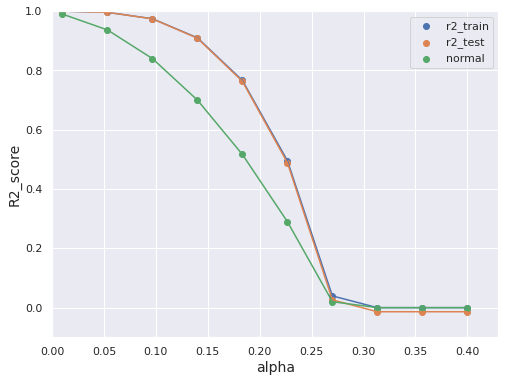

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'normal')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

We observed that as the regularization parameter alpha increases, the norm of the regression coefficient becomes smaller and smaller. This means that more regression coefficients are forced to zero, which increases the bias (oversimplification of the model). When α is kept low, it is the best balance between deviation and variance.

- 4) Random Forest Regression

In [32]:
# random forest regression to predict  

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=X_L.iloc[:,:-1]
y=X_L.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

8082.066940093881

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

89.90031668517014

- 5. Machine Learning

To create this model we need complete several steps:

1. First create an edited data dataframe, so our model can easily read the necessary stats of each pokemon
2.  Second, we need to split our dataframe's values into trainable and testable sets of data for our model
3.  Last, create our model and evaluate if it can truly guess if a pokemon is legendary or not

In [89]:
#Creation of data frame, and editing of dataframe to be usuable by our model.

df1=pd.DataFrame(Pokemon).fillna(0)

#Dropping all non-related Pokemon perfomance stats. 

X_L = df1.drop(columns=['pokedex_number','name','type1', 'type2','is_legendary','abilities','against_bug','against_dark','against_dragon',	'against_electric',	'against_fairy',	'against_fight',	'against_fire',	'against_flying',	'against_ghost','generation','japanese_name','against_grass',	'against_ground',	'against_ice',	'against_normal',	'against_poison',	'against_psychic',	'against_rock',	'against_steel'
, 'against_water','base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
Y_L = df1["is_legendary"]

In [90]:
from sklearn.model_selection import train_test_split

#Train test split 
X_train, X_test, y_train,y_test = train_test_split(X_L.values,Y_L.values)
print("Successful Split")

Successful Split


In [91]:
from sklearn.ensemble import RandomForestClassifier as RF
#Create Model 

clf = RF(bootstrap=True)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

#clf.predict(np.array([[120,600,75,3,88,100,75,142,50]]))[0] == 1

0.9751243781094527

### Section 4: New dataframe - "performance" between legendary and non legendary.

According to the offical pokemon website, unfortunately, they said there is no explicit criteria which defines these Pokémon is legendary or not.
We want to use the machine learnings we have learned in this course, tring to predict whether the performance data is related to whether it is a legendary. (or proof how they do not have strong relationship).

In [71]:
#set the new dataframe

temp=pd.DataFrame(Pokemon).fillna(0)
pokemon_performance = temp.drop(columns=['pokedex_number','type1', 'type2','abilities','against_bug','against_dark','against_dragon','against_electric',
                                         'against_fairy','against_fight','against_fire','against_flying','against_ghost','generation','japanese_name','against_grass',
                                         'against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel', 'against_water',
                                         'base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
pokemon_performance.set_index('name')
pokemon_performance_isleg=pd.DataFrame(pokemon_performance[pokemon_performance['is_legendary'] == 1])
pokemon_performance_isleg.index = pokemon_performance_isleg.index.values.astype(int)
pokemon_performance_isleg.set_index('name')

pokemon_performance_notleg=pd.DataFrame(pokemon_performance[pokemon_performance['is_legendary'] == 0])
pokemon_performance_notleg.index = pokemon_performance_notleg.index.values.astype(int)
pokemon_performance_notleg.set_index('name')



,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
name,,,,,,,,,,
Bulbasaur,49,318,49,0.7,45,65,65,45,6.9,0
Ivysaur,62,405,63,1.0,60,80,80,60,13.0,0
Venusaur,100,625,123,2.0,80,122,120,80,100.0,0
Charmander,52,309,43,0.6,39,60,50,65,8.5,0
Charmeleon,64,405,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...
Drampa,60,485,85,3.0,78,135,91,36,185.0,0
Dhelmise,131,517,100,3.9,70,86,90,40,210.0,0
Jangmo-o,55,300,65,0.6,45,45,45,45,29.7,0


([<matplotlib.patches.Wedge at 0x7fc2cd60c7f0>,
 [Text(1.0955717233453064, 0.09860324034328485, 'Under 45'),
  Text(1.0603591463250979, 0.2926405317188817, '45-60'),
  Text(0.7601688963389247, 0.7950743669864231, '60-90'),
  Text(-0.7601689707791557, 0.7950742958142712, '90-110'),
  Text(0.16108004860727904, -1.1891396965624674, 'Over 110')],
 [Text(0.597584576370167, 0.05378358564179173, '2.86 %'),
  Text(0.578377716177326, 0.1596221082102991, '2.86 %'),
  Text(0.4146375798212316, 0.43367692744713987, '14.29 %'),
  Text(-0.41463762042499397, 0.4336768886259661, '34.29 %'),
  Text(0.09396336168757942, -0.6936648229947725, '45.71 %')])

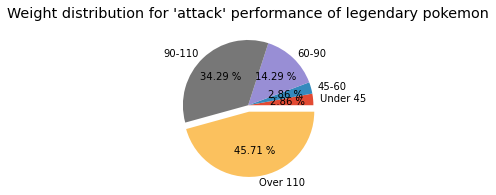

In [6]:
#1
plt.style.use('ggplot')
light_attack =pokemon_performance_isleg.loc[pokemon_performance_isleg.attack < 45].count()[0]
lightmedian_attack= pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 45)&(pokemon_performance_isleg.attack < 60)].count()[0]
median_attack= pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 60)&(pokemon_performance_isleg.attack < 90)].count()[0]
medianheavy_attack = pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 90)&(pokemon_performance_isleg.attack < 110)].count()[0]
heavy_attack =pokemon_performance_isleg.loc[pokemon_performance_isleg.attack >= 110].count()[0]

attack_perf=[light_attack,lightmedian_attack, median_attack, medianheavy_attack, heavy_attack]
fig, ax = plt.subplots(figsize = (6,3))
labels=['Under 45','45-60','60-90','90-110','Over 110']
explode=(0,0,0,0,0.1)
plt.title("Weight distribution for 'attack' performance of legendary pokemon")
plt.pie(attack_perf, labels=labels, autopct='%.2f %%', explode=explode)

([<matplotlib.patches.Wedge at 0x7fc2cd5fa670>,
 [Text(1.0057952886589099, 0.44539402478203555, '<45'),
  Text(0.15314236426764966, 1.0892875728045899, '45-60'),
  Text(-1.0970655092326054, -0.0802948843464163, '60-90'),
  Text(0.21372993760303968, -1.0790363820428859, '90-110'),
  Text(1.1794432640949635, -0.5467299029511906, '>110')],
 [Text(0.5486156119957689, 0.2429421953356557, '13.27 %'),
  Text(0.08353219869144525, 0.5941568578934125, '19.02 %'),
  Text(-0.5983993686723301, -0.04379720964349979, '37.76 %'),
  Text(0.11657996596529435, -0.5885652992961196, '16.14 %'),
  Text(0.7258112394430544, -0.33644917104688654, '13.82 %')])

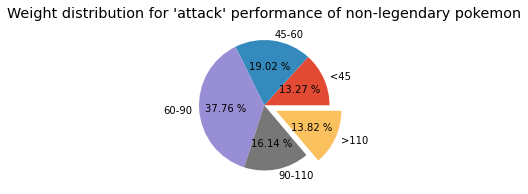

In [7]:
light_attack_2 =pokemon_performance_notleg.loc[pokemon_performance_notleg.attack < 45].count()[0]
lightmedian_attack_2= pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 45)&(pokemon_performance_notleg.attack < 60)].count()[0]
median_attack_2= pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 60)&(pokemon_performance_notleg.attack < 90)].count()[0]
medianheavy_attack_2 = pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 90)&(pokemon_performance_notleg.attack < 110)].count()[0]
heavy_attack_2 =pokemon_performance_notleg.loc[pokemon_performance_notleg.attack >= 110].count()[0]

attack_perf_2=[light_attack_2,lightmedian_attack_2, median_attack_2, medianheavy_attack_2,heavy_attack_2]
fig, ax = plt.subplots(figsize = (6,3))
labels=['<45','45-60','60-90','90-110','>110']
explode=(0,0,0,0,0.2)
plt.title("Weight distribution for 'attack' performance of non-legendary pokemon")
plt.pie(attack_perf_2, labels=labels, autopct='%.2f %%',explode=explode)

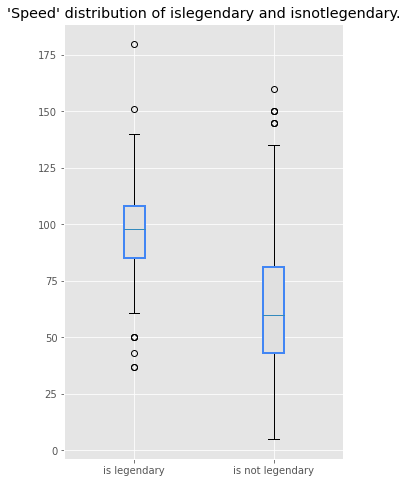

In [8]:
#2
plt.figure(figsize=(5,8))
speed_isleg=pokemon_performance_isleg['speed']
speed_notleg=pokemon_performance_notleg['speed']
labels=['is legendary','is not legendary']

boxes= plt.boxplot([speed_isleg,speed_notleg], labels=labels, patch_artist=True)
plt.title("'Speed' distribution of islegendary and isnotlegendary.")

for box in boxes['boxes']:
    box.set(color='#4286f4',linewidth=2)
    
    box.set(facecolor='#e0e0e0')
    
plt.show()


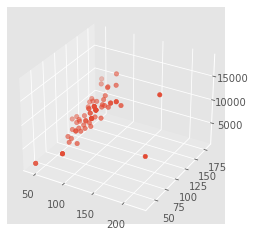

In [14]:
from mpl_toolkits import mplot3d

ax=plt.axes(projection="3d")

x_data_isleg=pokemon_performance_isleg['hp']
y_data_isleg=pokemon_performance_isleg['speed']
z_data_isleg=x_data*y_data
                                 
ax.scatter(x_data_isleg,y_data_isleg,z_data_isleg)
plt.show()

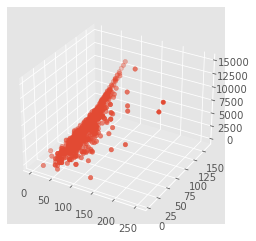

In [16]:
ax=plt.axes(projection="3d")

x_data_notleg=pokemon_performance_notleg['hp']
y_data_notleg=pokemon_performance_notleg['speed']
z_data_notleg=x_data_notleg*y_data_notleg
                                 
ax.scatter(x_data_notleg,y_data_notleg,z_data_notleg)
plt.show()

machine learning

In [59]:
X=pokemon_performance.drop(columns=['is_legendary','name'],axis=1)
Y=pokemon_performance['is_legendary']

In [60]:
#splitting data into train and test data
X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(801, 9) (640, 9) (161, 9)


In [61]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [62]:
clf.fit(X_train,Y_train)
clf.predict(X_test)

array([ 0.09053747, -0.0147636 , -0.08076271, -0.12446971,  0.02412379,
       -0.08019369,  0.23535931,  0.21019809, -0.09538078,  0.08441104,
        0.01932321,  0.16871971,  0.13883097, -0.01486763, -0.04660877,
       -0.03849389, -0.00656982,  0.04501266,  0.03675356,  0.04856079,
        0.10386855,  0.15371069, -0.06869286,  0.00621197,  0.19835068,
        0.10292893,  0.10557388,  0.09886116,  0.13589691, -0.04966201,
        0.25203911, -0.17113828,  0.10648347, -0.09207697,  0.20019067,
       -0.02437488,  0.21255676,  0.03062059,  0.51624307, -0.06149548,
        0.36158238,  0.13875159,  0.02923581,  0.34455112,  0.02585413,
        0.0824687 ,  0.04589586,  0.1237343 ,  0.12543349, -0.12614893,
        0.07681242, -0.00126211,  0.0497867 , -0.10720821,  0.18993285,
       -0.02461891, -0.08897665,  0.22604954,  0.09956025,  0.17908151,
        0.08025444, -0.05656352,  0.00528336, -0.0148582 , -0.05663724,
       -0.10235532,  0.14449805,  0.11375238,  0.36807752,  0.14

In [63]:
clf.score(X_test,Y_test) #accuracy is quite low: 0.34

0.34104395367448637